In [417]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
import warnings

warnings.filterwarnings("ignore")

In [418]:
# Load datasets
table = pd.read_csv('../scraping/tables/variable_data.csv')
laliga = pd.read_csv('../scraping/tables/laliga/laliga_all_seasons.csv', index_col=0)
# laliga = pd.read_csv('../scraping/tables/premier/premier_all_seasons.csv', index_col=0)

# Set column names for `laliga` from the first row of `table` (excluding the first column)
laliga.columns = table.iloc[0, 1:]

# Get columns to keep based on the second row of `table`
columns_to_keep = table.T.loc[table.iloc[1] == '1'].iloc[:, 0]

# Remove duplicate columns and keep only the desired ones
laliga = laliga.loc[:, ~laliga.columns.duplicated() & laliga.columns.isin(columns_to_keep)]

# Reorder columns: move key identifiers to the front
columns_to_front = ['season_id', 'match_id', 'team_name', 'team_id']
laliga = laliga[columns_to_front + [col for col in laliga.columns if col not in columns_to_front]]

# Split the position and save the 1st one
laliga['Position'] = laliga['Position'].str.split(',').str[0].str.strip()
# Resulting DataFrame
laliga

,season_id,match_id,team_name,team_id,Player Name,Shirt Number,Nationality,Position,Age at Season Start,Minutes Played,...,Aerial Duels Won,Shots on Target Against,Goals Against,Saves,Save Percentage,Post-Shot Expected Goals (PSxG),Opponent Crosses Faced,Crosses Stopped,Crosses Stopped Percentage,Defensive Actions Outside Penalty Area
0,1,1,Almería,H,Adri Embarba,10.0,es ESP,LW,31-096,90,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,Almería,H,Alejandro Pozo Pozo,17.0,es ESP,RB,24-170,65,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1,Almería,H,Diego Mariño,1.0,es ESP,GK,33-094,90,...,0,4.0,2.0,2.0,100.0,2.1,6.0,0.0,0.0,2.0
3,1,1,Almería,H,Dion Lopy,6.0,sn SEN,CM,21-190,13,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1,Almería,H,Gonzalo Melero,11.0,es ESP,CM,29-221,14,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79170,7,380,Real Sociedad,A,Raúl Navas,22.0,es ESP,CB,30-009,90,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79171,7,380,Real Sociedad,A,Sergio Canales,16.0,es ESP,RW,27-093,28,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79172,7,380,Real Sociedad,A,Willian José,12.0,br BRA,FW,26-178,90,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79173,7,380,Real Sociedad,A,Xabi Prieto,10.0,es ESP,DM,34-264,2,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [419]:
w2 = pd.read_csv("../scraping/tables/variable_data.csv")
w2
w2 = w2.transpose()
w2

columns_to_keep = w2[w2[1]=='1'].reset_index()
columns_to_keep = columns_to_keep.iloc[:,1:6]

columns_to_keep.set_index(0)
columns_to_keep.drop(1, axis=1, inplace=True)
columns_to_keep.columns = ["name","def", "mid", "off"]
w2 = columns_to_keep
w2 = w2.dropna()

w2["def"] = w2["def"].astype(int)
w2["mid"] = w2["mid"].astype(int)
w2["off"] = w2["off"].astype(int)

w2["def_w"] = w2["def"] / w2["def"].sum()
w2["mid_w"] = w2["mid"] / w2["mid"].sum()
w2["off_w"] = w2["off"] / w2["off"].sum()
w2

,name,def,mid,off,def_w,mid_w,off_w
6,Goals Scored,1,2,3,0.014925,0.024390,0.038462
7,Assists Provided,2,3,3,0.029851,0.036585,0.038462
8,Penalty Kicks Made,1,1,1,0.014925,0.012195,0.012821
9,Total Shots,1,2,3,0.014925,0.024390,0.038462
10,Shots on Target,1,2,3,0.014925,0.024390,0.038462
11,Non-Penalty Expected Goals (npxG),1,2,3,0.014925,0.024390,0.038462
12,Shot-Creating Actions,2,3,3,0.029851,0.036585,0.038462
13,Goal-Creating Actions,2,3,3,0.029851,0.036585,0.038462
14,Total Passes Completed,2,3,2,0.029851,0.036585,0.025641
15,Total Passes Attempted,1,2,1,0.014925,0.024390,0.012821


In [420]:
import pandas as pd

# Supongamos que tienes un DataFrame llamado 'df'
# A continuación, el código para convertirlo al formato deseado:

w = {
    row['name']: {
        'def': row['def_w'],
        'mid': row['mid_w'],
        'off': row['off_w']
    }
    for _, row in w2.iterrows()
}

w

{'Goals Scored': {'def': 0.014925373134328358,
  'mid': 0.024390243902439025,
  'off': 0.038461538461538464},
 'Assists Provided': {'def': 0.029850746268656716,
  'mid': 0.036585365853658534,
  'off': 0.038461538461538464},
 'Penalty Kicks Made': {'def': 0.014925373134328358,
  'mid': 0.012195121951219513,
  'off': 0.01282051282051282},
 'Total Shots': {'def': 0.014925373134328358,
  'mid': 0.024390243902439025,
  'off': 0.038461538461538464},
 'Shots on Target': {'def': 0.014925373134328358,
  'mid': 0.024390243902439025,
  'off': 0.038461538461538464},
 'Non-Penalty Expected Goals (npxG)': {'def': 0.014925373134328358,
  'mid': 0.024390243902439025,
  'off': 0.038461538461538464},
 'Shot-Creating Actions': {'def': 0.029850746268656716,
  'mid': 0.036585365853658534,
  'off': 0.038461538461538464},
 'Goal-Creating Actions': {'def': 0.029850746268656716,
  'mid': 0.036585365853658534,
  'off': 0.038461538461538464},
 'Total Passes Completed': {'def': 0.029850746268656716,
  'mid': 0.03

In [421]:
media_y_desv = {
    "medias": {"def": 7, "mid": 7, "off": 2},
    "desviaciones estándar": {"def": 2, "mid": 2, "off": 2},
}

In [422]:
import numpy as np
positions = laliga["Position"].unique()
unique_positions = np.unique(np.concatenate([pos.split(",") for pos in positions]))
unique_positions

array(['AM', 'CB', 'CM', 'DM', 'FW', 'GK', 'LB', 'LM', 'LW', 'RB', 'RM',
       'RW', 'WB'], dtype='<U2')

In [423]:
off_pos = ['FW', 'LW', 'RW']
mid_pos = ['AM', 'CM', 'DM', 'LM', 'RM']
def_pos = ['CB', 'LB', 'RB', 'WB']
gk_pos = ['GK']

In [424]:
posiciones_especiales = ["GK"]

In [425]:
def define_group(position):
    if position in off_pos:
        return "off"
    if position in mid_pos:
        return "mid"
    if position in def_pos:
        return "def"

In [426]:
for player, stat in laliga.iterrows():
    group = define_group(laliga.loc[player,"Position"])
    laliga.loc[player, "Group"] = group

In [427]:
laliga.head(5)

,season_id,match_id,team_name,team_id,Player Name,Shirt Number,Nationality,Position,Age at Season Start,Minutes Played,...,Shots on Target Against,Goals Against,Saves,Save Percentage,Post-Shot Expected Goals (PSxG),Opponent Crosses Faced,Crosses Stopped,Crosses Stopped Percentage,Defensive Actions Outside Penalty Area,Group
0,1,1,Almería,H,Adri Embarba,10.0,es ESP,LW,31-096,90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,off
1,1,1,Almería,H,Alejandro Pozo Pozo,17.0,es ESP,RB,24-170,65,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,def
2,1,1,Almería,H,Diego Mariño,1.0,es ESP,GK,33-094,90,...,4.0,2.0,2.0,100.0,2.1,6.0,0.0,0.0,2.0,None
3,1,1,Almería,H,Dion Lopy,6.0,sn SEN,CM,21-190,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mid
4,1,1,Almería,H,Gonzalo Melero,11.0,es ESP,CM,29-221,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mid


In [428]:
# laliga.insert(0, 'ID', range(len(laliga)))

laliga.columns

new = laliga

new = new.drop(new.columns[-10:-1], axis=1)

new = new.drop(new.columns[0:9], axis=1)

df_grouped = new.groupby('Group').mean().iloc[:, 1:]

medias = {col: df_grouped[col].to_dict() for col in df_grouped.columns}

medias

{'Goals Scored': {'def': 0.03191901954700589,
  'mid': 0.06969131674351484,
  'off': 0.1942970822281167},
 'Assists Provided': {'def': 0.042856034750232704,
  'mid': 0.06821301608531907,
  'off': 0.08034074678637013},
 'Penalty Kicks Made': {'def': 0.0008920260626745269,
  'mid': 0.007708282003449368,
  'off': 0.022087329116506835},
 'Total Shots': {'def': 0.43600682593856654,
  'mid': 0.7980711696174018,
  'off': 1.4213425831462967},
 'Shots on Target': {'def': 0.11801892646602544,
  'mid': 0.24599626905071978,
  'off': 0.5342277086308916},
 'Red Cards': {'def': 0.011092150170648464,
  'mid': 0.007145119847946218,
  'off': 0.005100999795960008},
 'Interceptions Made': {'def': 1.0871082842072604,
  'mid': 0.6707261272042518,
  'off': 0.250510099979596},
 'Non-Penalty Expected Goals (npxG)': {'def': 0.03321827489916227,
  'mid': 0.0635563690120024,
  'off': 0.17673944093042238},
 'Shot-Creating Actions': {'def': 1.054956562209122,
  'mid': 1.6928302418077505,
  'off': 1.7120485615180576

In [429]:
new

,Minutes Played,Goals Scored,Assists Provided,Penalty Kicks Made,Total Shots,Shots on Target,Red Cards,Interceptions Made,Non-Penalty Expected Goals (npxG),Shot-Creating Actions,...,Carries into Final Third,Carries into Penalty Area,Progressive Passes Received,Second Yellow Cards,Offsides Committed,Penalty Kicks Won,Penalty Kicks Conceded,Ball Recoveries,Aerial Duels Won,Group
0,90,0,0,0,3,0,0,0,0.1,3,...,1,0,9,0,0,0,0,5,1,off
1,65,0,0,0,0,0,0,0,0.0,1,...,0,0,4,0,0,0,0,1,1,def
2,90,0,0,0,0,0,0,0,0.0,0,...,0,0,0,0,0,0,0,1,0,None
3,13,0,0,0,1,0,0,0,0.0,0,...,0,0,0,0,0,0,0,1,0,mid
4,14,0,0,0,0,0,0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,mid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79170,90,0,0,0,2,0,0,1,0.1,0,...,0,0,0,0,0,0,0,2,0,def
79171,28,0,0,0,1,0,0,0,0.0,4,...,3,0,3,0,0,0,0,3,0,off
79172,90,0,0,0,4,1,0,0,0.2,3,...,1,0,8,0,0,0,0,1,1,off
79173,2,0,0,0,0,0,0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,mid


In [430]:
weights = {
    "Goals Scored": {
        "def": 0.1,
        "mid": 0.3,
        "off": 1.0
    },
    "Assists Provided": {
        "def": 0.2,
        "mid": 0.8,
        "off": 0.7
    },
    "Penalty Kicks Made": {
        "def": 0.1,
        "mid": 0.1,
        "off": 0.3
    },
    "Total Shots": {
        "def": 0.1,
        "mid": 0.5,
        "off": 0.9
    },
    "Shots on Target": {
        "def": 0.2,
        "mid": 0.6,
        "off": 0.8
    },
    "Red Cards": {
        "def": -0.5,
        "mid": -0.3,
        "off": -0.4
    },
    "Interceptions Made": {
        "def": 1.0,
        "mid": 0.6,
        "off": 0.2
    },
    "Non-Penalty Expected Goals (npxG)": {
        "def": 0.1,
        "mid": 0.5,
        "off": 1.0
    },
    "Shot-Creating Actions": {
        "def": 0.3,
        "mid": 0.8,
        "off": 1.0
    },
    "Goal-Creating Actions": {
        "def": 0.2,
        "mid": 0.8,
        "off": 1.0
    },
    "Progressive Passes": {
        "def": 0.3,
        "mid": 1.0,
        "off": 0.7
    },
    "Take-Ons Attempted": {
        "def": 0.1,
        "mid": 0.5,
        "off": 0.8
    },
    "Successful Take-Ons": {
        "def": 0.1,
        "mid": 0.4,
        "off": 0.7
    },
    "Total Passes Completed": {
        "def": 0.4,
        "mid": 1.0,
        "off": 0.5
    },
    "Total Passes Attempted": {
        "def": 0.3,
        "mid": 0.9,
        "off": 0.6
    },
    "Expected Assists (xA)": {
        "def": 0.2,
        "mid": 1.0,
        "off": 0.8
    },
    "Key Passes (Leading to Shots)": {
        "def": 0.3,
        "mid": 0.9,
        "off": 1.0
    },
    "Passes into Penalty Area": {
        "def": 0.2,
        "mid": 0.9,
        "off": 1.0
    },
    "Crosses into Penalty Area": {
        "def": 0.1,
        "mid": 0.6,
        "off": 0.8
    },
    "Through Balls Completed": {
        "def": 0.2,
        "mid": 0.9,
        "off": 0.9
    },
    "Passes Offside": {
        "def": 0.1,
        "mid": 0.3,
        "off": 0.6
    },
    "Tackles Won": {
        "def": 0.8,
        "mid": 0.6,
        "off": 0.3
    },
    "Tackles in Defensive Third": {
        "def": 1.0,
        "mid": 0.7,
        "off": 0.3
    },
    "Tackles in Middle Third": {
        "def": 0.7,
        "mid": 0.8,
        "off": 0.4
    },
    "Tackles in Attacking Third": {
        "def": 0.3,
        "mid": 0.6,
        "off": 0.5
    },
    "Shots Blocked": {
        "def": 0.9,
        "mid": 0.5,
        "off": 0.3
    },
    "Clearances Made": {
        "def": 1.0,
        "mid": 0.5,
        "off": 0.2
    },
    "Errors Leading to Opponent Shots": {
        "def": -1.0,
        "mid": -0.6,
        "off": -0.3
    },
    "Live-Ball Touches": {
        "def": 0.5,
        "mid": 0.8,
        "off": 0.7
    },
    "Progressive Carrying Distance (Yards)": {
        "def": 0.4,
        "mid": 0.8,
        "off": 1.0
    },
    "Carries into Final Third": {
        "def": 0.6,
        "mid": 0.9,
        "off": 1.0
    },
    "Carries into Penalty Area": {
        "def": 0.4,
        "mid": 0.8,
        "off": 1.0
    },
    "Progressive Passes Received": {
        "def": 0.4,
        "mid": 1.0,
        "off": 0.8
    },
    "Second Yellow Cards": {
        "def": 0.5,
        "mid": 0.4,
        "off": 0.3
    },
    "Offsides Committed": {
        "def": 0.2,
        "mid": 0.3,
        "off": 0.7
    },
    "Penalty Kicks Won": {
        "def": 0.1,
        "mid": 0.3,
        "off": 0.7
    },
    "Penalty Kicks Conceded": {
        "def": 0.4,
        "mid": 0.2,
        "off": 0.1
    },
    "Ball Recoveries": {
        "def": 1.0,
        "mid": 0.8,
        "off": 0.2
    },
    "Aerial Duels Won": {
        "def": 0.8,
        "mid": 0.5,
        "off": 0.3
    }
}

position_sums = {"def": 0, "mid": 0, "off": 0}

# Iterate over the weights dictionary and aggregate by position
for stat, pos_weights in weights.items():
    for position, weight in pos_weights.items():
        position_sums[position] += weight

position_sums

{'def': 13.100000000000001, 'mid': 23.0, 'off': 23.400000000000002}

In [431]:
new = new.iloc[:, 1:]
new = new[new["Group"].notna()]

medias = weights

def compute_score(row):
    score = 0
    for col in new.columns:
        if col == "Group":
            continue
        group = row["Group"]
        score += (row[col] / medias[col][group]) * w[col][group]
    return score

new["Score"] = new.apply(compute_score, axis=1)

In [432]:
new[new['Score']==new['Score'].max()]

,Goals Scored,Assists Provided,Penalty Kicks Made,Total Shots,Shots on Target,Red Cards,Interceptions Made,Non-Penalty Expected Goals (npxG),Shot-Creating Actions,Goal-Creating Actions,...,Carries into Penalty Area,Progressive Passes Received,Second Yellow Cards,Offsides Committed,Penalty Kicks Won,Penalty Kicks Conceded,Ball Recoveries,Aerial Duels Won,Group,Score
24759,0,0,0,1,0,0,3,0.1,2,1,...,0,0,0,0,0,0,5,9,def,67.094527


In [433]:
names = laliga[laliga['Position']!='GK']['Player Name']

new['name player'] = names

In [434]:
new.groupby('name player')['Score'].sum().sort_values(ascending=False).head(25)

name player
Jordi Alba          3880.536965
Jesús Navas         3831.074818
Jules Koundé        3637.883085
Gerard Piqué        3630.204818
Iñigo Martínez      3380.210683
Pau Torres          3334.971302
Nacho               3302.213021
Dani Carvajal       3234.482014
José Luis Gayà      3233.285301
Aïssa Mandi         3218.572850
Robin Le Normand    3125.293490
Mario Hermoso       2936.915977
Raúl Albiol         2871.725302
Igor Zubeldia       2829.820963
Clément Lenglet     2828.893746
Toni Kroos          2790.556349
Sergio Ramos        2768.567520
Javi Galán          2762.715158
Gabriel Paulista    2734.723584
Hugo Mallo          2725.213742
Unai Núñez          2672.708962
Yeray Álvarez       2640.609309
Yuri Berchiche      2597.026598
Stefan Savić        2569.777541
Daniel Parejo       2554.963086
Name: Score, dtype: float64

In [435]:
new[(new['name player']=='Gerard Piqué')].sort_values(by='Score')

,Goals Scored,Assists Provided,Penalty Kicks Made,Total Shots,Shots on Target,Red Cards,Interceptions Made,Non-Penalty Expected Goals (npxG),Shot-Creating Actions,Goal-Creating Actions,...,Progressive Passes Received,Second Yellow Cards,Offsides Committed,Penalty Kicks Won,Penalty Kicks Conceded,Ball Recoveries,Aerial Duels Won,Group,Score,name player
25147,0,0,0,1,0,0,0,0.0,1,1,...,0,0,0,0,0,1,1,off,0.454823,Gerard Piqué
15470,0,0,0,0,0,0,0,0.0,0,0,...,0,0,0,0,0,1,0,def,2.124378,Gerard Piqué
24123,0,0,0,0,0,0,0,0.0,0,0,...,0,0,0,0,0,0,1,def,4.058458,Gerard Piqué
28316,0,0,0,0,0,0,0,0.0,0,0,...,0,0,0,0,0,2,0,off,4.485958,Gerard Piqué
34164,0,0,0,0,0,0,1,0.0,1,1,...,0,0,0,0,0,3,0,def,6.915423,Gerard Piqué
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42671,0,0,0,0,0,0,0,0.0,0,0,...,0,0,0,0,0,2,6,def,42.970860,Gerard Piqué
13250,0,0,0,0,0,0,2,0.0,2,0,...,0,0,0,0,0,5,4,def,43.014925,Gerard Piqué
30960,0,0,0,0,0,1,2,0.0,1,0,...,1,1,0,0,0,8,4,def,46.977612,Gerard Piqué
13903,0,0,0,0,0,0,0,0.0,0,0,...,1,0,0,0,0,6,8,def,52.291045,Gerard Piqué


In [436]:
yy = new.groupby('Group')['Score'].sum()/new['Score'].sum()
yy

Group
def    0.600380
mid    0.279625
off    0.119994
Name: Score, dtype: float64

In [437]:
def modifi(x):
    if x['Group'] == 'off':
        return x['Score'] / yy.iloc[2]
    if x['Group'] == 'mid':
        return x['Score'] / yy.iloc[1]
    if x['Group'] == 'def':
        return x['Score'] / yy.iloc[0]

new['modified_score'] = new.apply(modifi, axis=1)

In [438]:
new.groupby('Group')['modified_score'].sum()/new['modified_score'].sum()

Group
def    0.333333
mid    0.333333
off    0.333333
Name: modified_score, dtype: float64

In [439]:
new.groupby('name player')['modified_score'].sum().sort_values(ascending=False).head(25)

name player
Lionel Messi         13581.707542
Iago Aspas           12862.665148
Antoine Griezmann    11006.173196
Vinicius Júnior      10752.138730
Karim Benzema        10414.796845
Sergio Canales       10121.367801
Toni Kroos            9979.626376
Iñaki Williams        9586.240441
Daniel Parejo         9137.094474
Gerard Moreno         8593.815298
Luka Modrić           8057.228286
Ousmane Dembélé       7884.661768
Frenkie de Jong       7662.600766
Koke                  7621.829558
Jesús Navas           7592.604137
Sergio Busquets       7544.501290
Marco Asensio         7442.769540
Jordi Alba            7277.019400
Mikel Oyarzabal       7272.597209
Lucas Ocampos         7157.769598
Ivan Rakitić          7138.040432
José Luis Morales     6939.339331
Rodrygo               6877.611825
Federico Valverde     6477.110647
Iker Muniain          6303.993189
Name: modified_score, dtype: float64

In [440]:
new[(new['name player']=='Lionel Messi')].sort_values(by='modified_score')

,Goals Scored,Assists Provided,Penalty Kicks Made,Total Shots,Shots on Target,Red Cards,Interceptions Made,Non-Penalty Expected Goals (npxG),Shot-Creating Actions,Goal-Creating Actions,...,Second Yellow Cards,Offsides Committed,Penalty Kicks Won,Penalty Kicks Conceded,Ball Recoveries,Aerial Duels Won,Group,Score,name player,modified_score
74598,0,1,0,0,0,0,0,0.0,2,1,...,0,0,0,0,0,0,off,1.909341,Lionel Messi,15.911932
41957,1,0,0,2,1,0,0,0.1,3,0,...,0,0,0,0,1,0,mid,4.941938,Lionel Messi,17.673426
60352,1,1,0,2,1,0,0,0.1,2,1,...,0,0,0,0,0,0,off,2.972990,Lionel Messi,24.776104
48536,0,1,0,1,0,0,0,0.0,1,1,...,0,0,0,0,0,0,off,3.437042,Lionel Messi,28.643386
77548,0,0,0,1,0,0,0,0.0,1,0,...,0,0,0,0,1,0,off,4.044414,Lionel Messi,33.705059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64558,1,0,1,10,3,0,1,0.7,15,1,...,0,0,0,0,2,0,off,17.483323,Lionel Messi,145.701320
78245,3,0,0,9,5,0,0,2.2,14,2,...,0,0,0,0,3,2,off,17.794170,Lionel Messi,148.291831
51360,3,0,0,7,4,0,0,0.6,9,0,...,0,0,0,0,1,0,off,18.202004,Lionel Messi,151.690617
42518,1,0,1,7,2,0,0,0.8,6,0,...,0,0,0,0,1,1,off,18.509707,Lionel Messi,154.254927


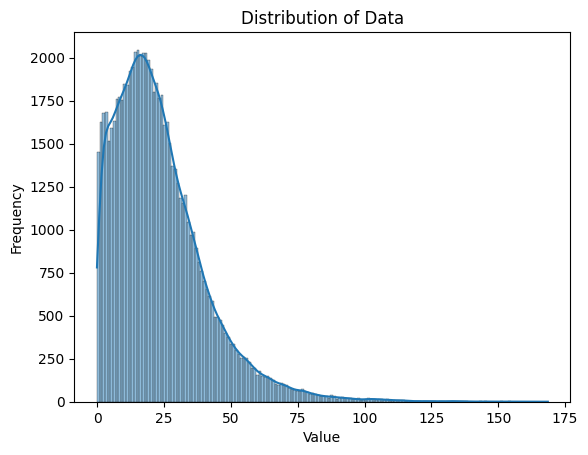

In [441]:
import seaborn as sns
import matplotlib.pyplot as plt

data = new['modified_score']

sns.histplot(data, kde=True)  # kde=True adds a Kernel Density Estimate line
plt.title("Distribution of Data")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [444]:
new

,Goals Scored,Assists Provided,Penalty Kicks Made,Total Shots,Shots on Target,Red Cards,Interceptions Made,Non-Penalty Expected Goals (npxG),Shot-Creating Actions,Goal-Creating Actions,...,Second Yellow Cards,Offsides Committed,Penalty Kicks Won,Penalty Kicks Conceded,Ball Recoveries,Aerial Duels Won,Group,Score,name player,modified_score
0,0,0,0,3,0,0,0,0.1,3,0,...,0,0,0,0,5,1,off,6.954625,Adri Embarba,57.957973
1,0,0,0,0,0,0,0,0.0,1,0,...,0,0,0,0,1,1,def,9.978856,Alejandro Pozo Pozo,16.620889
3,0,0,0,1,0,0,0,0.0,0,0,...,0,0,0,0,1,0,mid,1.815718,Dion Lopy,6.493396
4,0,0,0,0,0,0,0,0.0,0,0,...,0,0,0,0,0,0,mid,3.193767,Gonzalo Melero,11.421594
5,0,0,0,2,0,0,1,0.4,3,0,...,0,0,0,0,7,2,mid,4.533691,Iddrisu Baba,16.213450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79170,0,0,0,2,0,0,1,0.1,0,0,...,0,0,0,0,2,0,def,9.419154,Raúl Navas,15.688644
79171,0,0,0,1,0,0,0,0.0,4,0,...,0,0,0,0,3,0,off,5.084325,Sergio Canales,42.371402
79172,0,0,0,4,1,0,0,0.2,3,0,...,0,0,0,0,1,1,off,4.733450,Willian José,39.447304
79173,0,0,0,0,0,0,0,0.0,0,0,...,0,0,0,0,0,0,mid,0.000000,Xabi Prieto,0.000000


In [478]:
new.sample(1)

,Goals Scored,Assists Provided,Penalty Kicks Made,Total Shots,Shots on Target,Red Cards,Interceptions Made,Non-Penalty Expected Goals (npxG),Shot-Creating Actions,Goal-Creating Actions,...,Second Yellow Cards,Offsides Committed,Penalty Kicks Won,Penalty Kicks Conceded,Ball Recoveries,Aerial Duels Won,Group,Score,name player,modified_score
50106,0,0,0,0,0,0,1,0.0,3,1,...,0,0,0,0,3,2,mid,2.817073,Nemanja Maksimović,10.074456
